# The Database speak about (A study on the behaviors of workers in the field of Data Science & AI and any field they have in common


In [71]:
import pandas as pd
import numpy as np


In [72]:
# Load the uploaded dataset
data = pd.read_excel('Power BI - Final Project.xlsx')

# Display basic information about the dataset
data.info(), data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 28 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Unique ID                                                                                     630 non-null    object 
 1   Email                                                                                         630 non-null    object 
 2   Date Taken (America/New_York)                                                                 630 non-null    object 
 3   Time Taken (America/New_York)                                                                 630 non-null    object 
 4   Browser                                                                                       0 non-null      float64
 5   OS                           

(None,
                   Unique ID      Email Date Taken (America/New_York)  \
 0  62a33b3db4da29969c62df3d  anonymous                     6/10/2022   
 1  62a33ba1bae91e4b8b82e35c  anonymous                     6/10/2022   
 2  62a33c2cbc6861bf3176bec1  anonymous                     6/10/2022   
 3  62a33c8624a26260273822f9  anonymous                     6/10/2022   
 4  62a33c91f3072dd892621e03  anonymous                     6/10/2022   
 
   Time Taken (America/New_York)  Browser  OS  City  Country  Referrer  \
 0                          8:38      NaN NaN   NaN      NaN       NaN   
 1                          8:40      NaN NaN   NaN      NaN       NaN   
 2                          8:42      NaN NaN   NaN      NaN       NaN   
 3                          8:43      NaN NaN   NaN      NaN       NaN   
 4                          8:44      NaN NaN   NaN      NaN       NaN   
 
   Time Spent  ...  \
 0    0:00:44  ...   
 1    0:01:30  ...   
 2    0:02:18  ...   
 3    0:02:10  ... 

# Step 1: Data Preprocessing (Continued)
The dataset has been cleaned by removing columns with a high percentage of missing values and dropping irrelevant columns. The cleaned dataset has 561 entries and 19 columns.

In [73]:
# Step 1: Data Preprocessing

# Drop columns with a high percentage of missing values
data = data.drop(columns=['Browser', 'OS', 'City', 'Country', 'Referrer'])

In [74]:
# Drop irrelevant columns
data = data.drop(columns=['Unique ID', 'Email', 'Date Taken (America/New_York)', 'Time Taken (America/New_York)'])


In [75]:
# Display missing values in each column
missing_values = data.isnull().sum()

In [76]:
# Drop rows with missing values in critical columns (we can adjust this later if needed)
data = data.dropna()

In [14]:
# Display the cleaned data info
cleaned_data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 48 to 629
Data columns (total 19 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Time Spent                                                                                    561 non-null    object 
 1   Q1 - Which Title Best Fits your Current Role?                                                 561 non-null    object 
 2   Q2 - Did you switch careers into Data?                                                        561 non-null    object 
 3   Q3 - Current Yearly Salary (in USD)                                                           561 non-null    object 
 4   Q4 - What Industry do you work in?                                                            561 non-null    object 
 5   Q5 - Favorite Programming La

In [15]:
# Display the first few rows of the cleaned data
cleaned_data_head = data.head()

cleaned_data_info, cleaned_data_head

(None,
    Time Spent Q1 - Which Title Best Fits your Current Role?  \
 48    0:00:56                                  Data Analyst   
 51    0:01:59                          Student/Looking/None   
 52    0:01:18                                 Data Engineer   
 54    0:01:44                                  Data Analyst   
 55    0:01:58      Other (Please Specify):Business Analyst    
 
    Q2 - Did you switch careers into Data? Q3 - Current Yearly Salary (in USD)  \
 48                                    Yes                             41k-65k   
 51                                    Yes                               0-40k   
 52                                     No                             66k-85k   
 54                                    Yes                             66k-85k   
 55                                     No                             41k-65k   
 
                    Q4 - What Industry do you work in?  \
 48                                            Finance 

# Step 2: Data Visualization
Let's create visualizations to understand the data better. We will create:

**1) A bar plot for the current roles of the respondents.**

**2) A pie chart for the distribution of the genders.**

**3) A histogram for the age distribution.**

**Note: this is basic Visualization, My Real Visualization (Datshobord) on PowerBI**


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# Set plot style
sns.set(style="whitegrid")

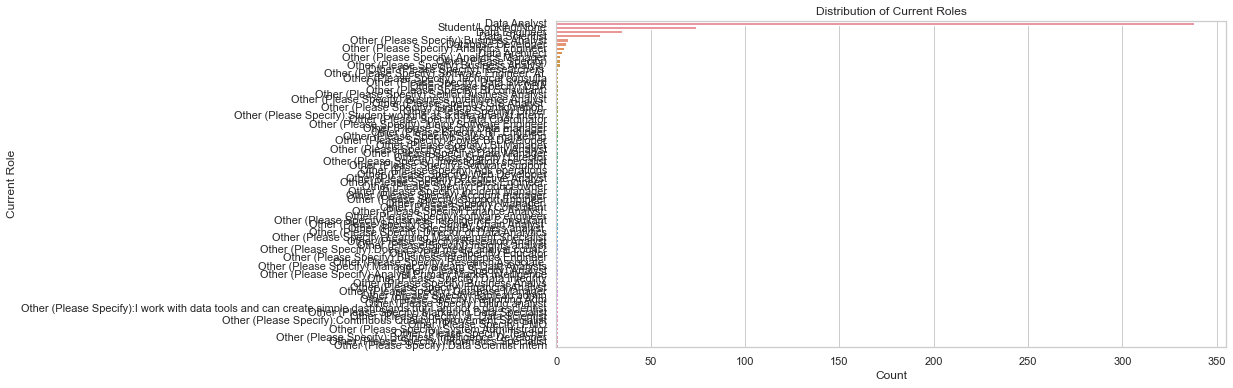

In [79]:
# Bar plot for the current roles
plt.figure(figsize=(12, 6))
sns.countplot(y='Q1 - Which Title Best Fits your Current Role?', data=data, order=data['Q1 - Which Title Best Fits your Current Role?'].value_counts().index)
plt.title('Distribution of Current Roles')
plt.xlabel('Count')
plt.ylabel('Current Role')
plt.show()

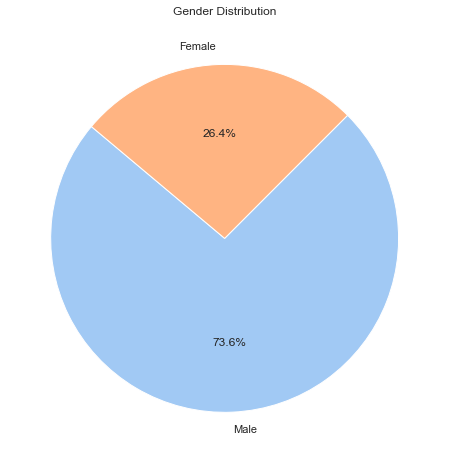

In [50]:
# Pie chart for gender distribution
plt.figure(figsize=(8, 8))
gender_counts = data['Q9 - Male/Female?'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Gender Distribution')
plt.show()

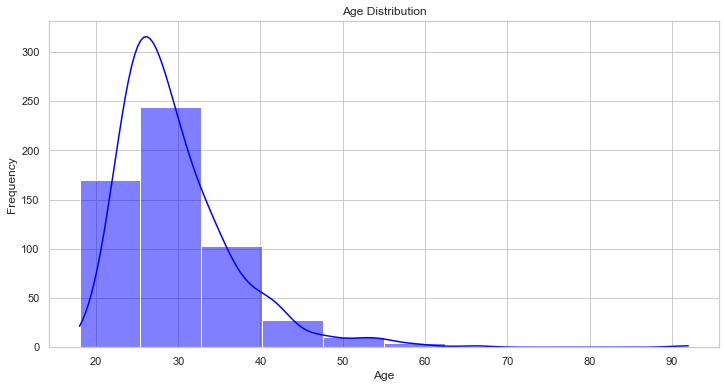

In [51]:
# Histogram for age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Q10 - Current Age'], bins=10, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Step 3: One-Hot Encoding
**Apply one-hot encoding to the categorical variables:**

In [94]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,Q6 - How Happy are you in your Current Position with the following? (Salary),Q6 - How Happy are you in your Current Position with the following? (Work/Life Balance),Q6 - How Happy are you in your Current Position with the following? (Coworkers),Q6 - How Happy are you in your Current Position with the following? (Management),Q6 - How Happy are you in your Current Position with the following? (Upward Mobility),Q6 - How Happy are you in your Current Position with the following? (Learning New Things),Q10 - Current Age,Time Spent_0:00:43,Time Spent_0:00:47,Time Spent_0:00:48,...,Q13 - Ethnicity_Other (Please Specify):Moroccan,Q13 - Ethnicity_Other (Please Specify):N/A,Q13 - Ethnicity_Other (Please Specify):Nigeria,Q13 - Ethnicity_Other (Please Specify):Pakistani,Q13 - Ethnicity_Other (Please Specify):Prefer not to ans,Q13 - Ethnicity_Other (Please Specify):Race isn't a thing,Q13 - Ethnicity_Other (Please Specify):Russian,Q13 - Ethnicity_Other (Please Specify):South Indian,Q13 - Ethnicity_Other (Please Specify):arab,Q13 - Ethnicity_White or Caucasian
48,5.0,6.0,6.0,6.0,6.0,6.0,33,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51,1.0,3.0,6.0,6.0,6.0,9.0,36,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,2.0,1.0,1.0,1.0,3.0,7.0,28,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,6.0,6.0,6.0,6.0,5.0,6.0,24,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,3.0,6.0,7.0,7.0,0.0,3.0,29,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Step 4: Building Classification Model with Python
**Build a classification model using Scikit-learn:**

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [96]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
y

48     1
51     1
52     0
54     0
55     1
      ..
625    1
626    1
627    1
628    1
629    1
Name: Q9 - Male/Female?_Male, Length: 561, dtype: uint8

In [91]:
# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [98]:
# Make predictions
y_pred = model.predict(X_test)

In [99]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7396449704142012


# Step 5: Confusion Matrix
**Generate and display the confusion matrix:**

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [101]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

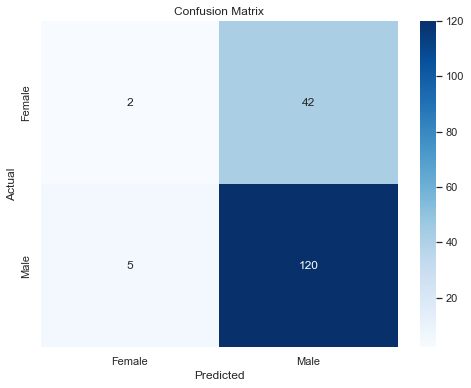

In [35]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Exploratory Data Analysis (EDA)
**1) Correlation Analysis:**
- Identify correlations between different features and the target variable.

- Use a heatmap to visualize the correlation matrix.

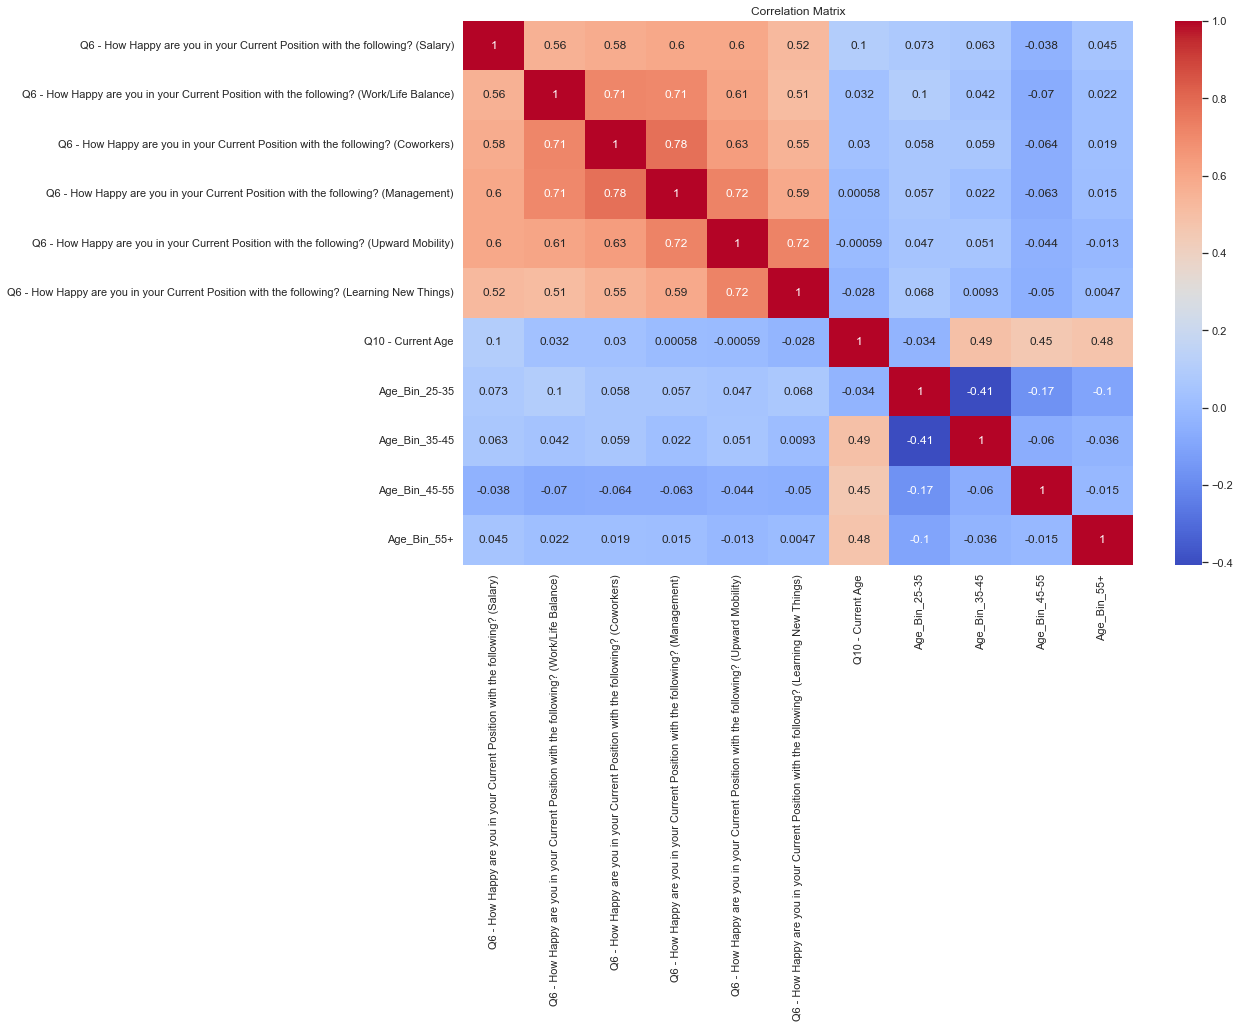

In [61]:
# Correlation Matrix
plt.figure(figsize=(15, 10))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 2) Feature Engineering
- Create new features from existing ones if they provide additional insights or improve model performance.

- For example, you can bin continuous features like age or salary into categories.

In [102]:
# Binning Age into categories
bins = [0, 25, 35, 45, 55, 100]
labels = ['<25', '25-35', '35-45', '45-55', '55+']
data['Age_Bin'] = pd.cut(data['Q10 - Current Age'], bins=bins, labels=labels)

# One-Hot Encode the new feature
data_encoded = pd.get_dummies(data, columns=['Age_Bin'], drop_first=True)


# Model Evaluation and Selection
**3) Model Comparison:**

- Compare multiple classification models such as Logistic Regression, Decision Trees, and Support Vector Machines.

- Evaluate their performance using cross-validation.

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{name} Accuracy: {scores.mean()}')


RandomForest Accuracy: 0.7167802661473548


A:\anconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.69143135345667
DecisionTree Accuracy: 0.6325868224602401
SVM Accuracy: 0.7346965271015904


# * (Model Comparison)


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{name} Accuracy: {scores.mean()}')


RandomForest Accuracy: 0.7346965271015904


A:\anconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.69143135345667
DecisionTree Accuracy: 0.625056799740344
SVM Accuracy: 0.7346965271015904


# Improved Visualization
**7) Advanced Visualizations:**

- Pair plots to show relationships between multiple features.
- Violin plots to show the distribution of data and its probability density.

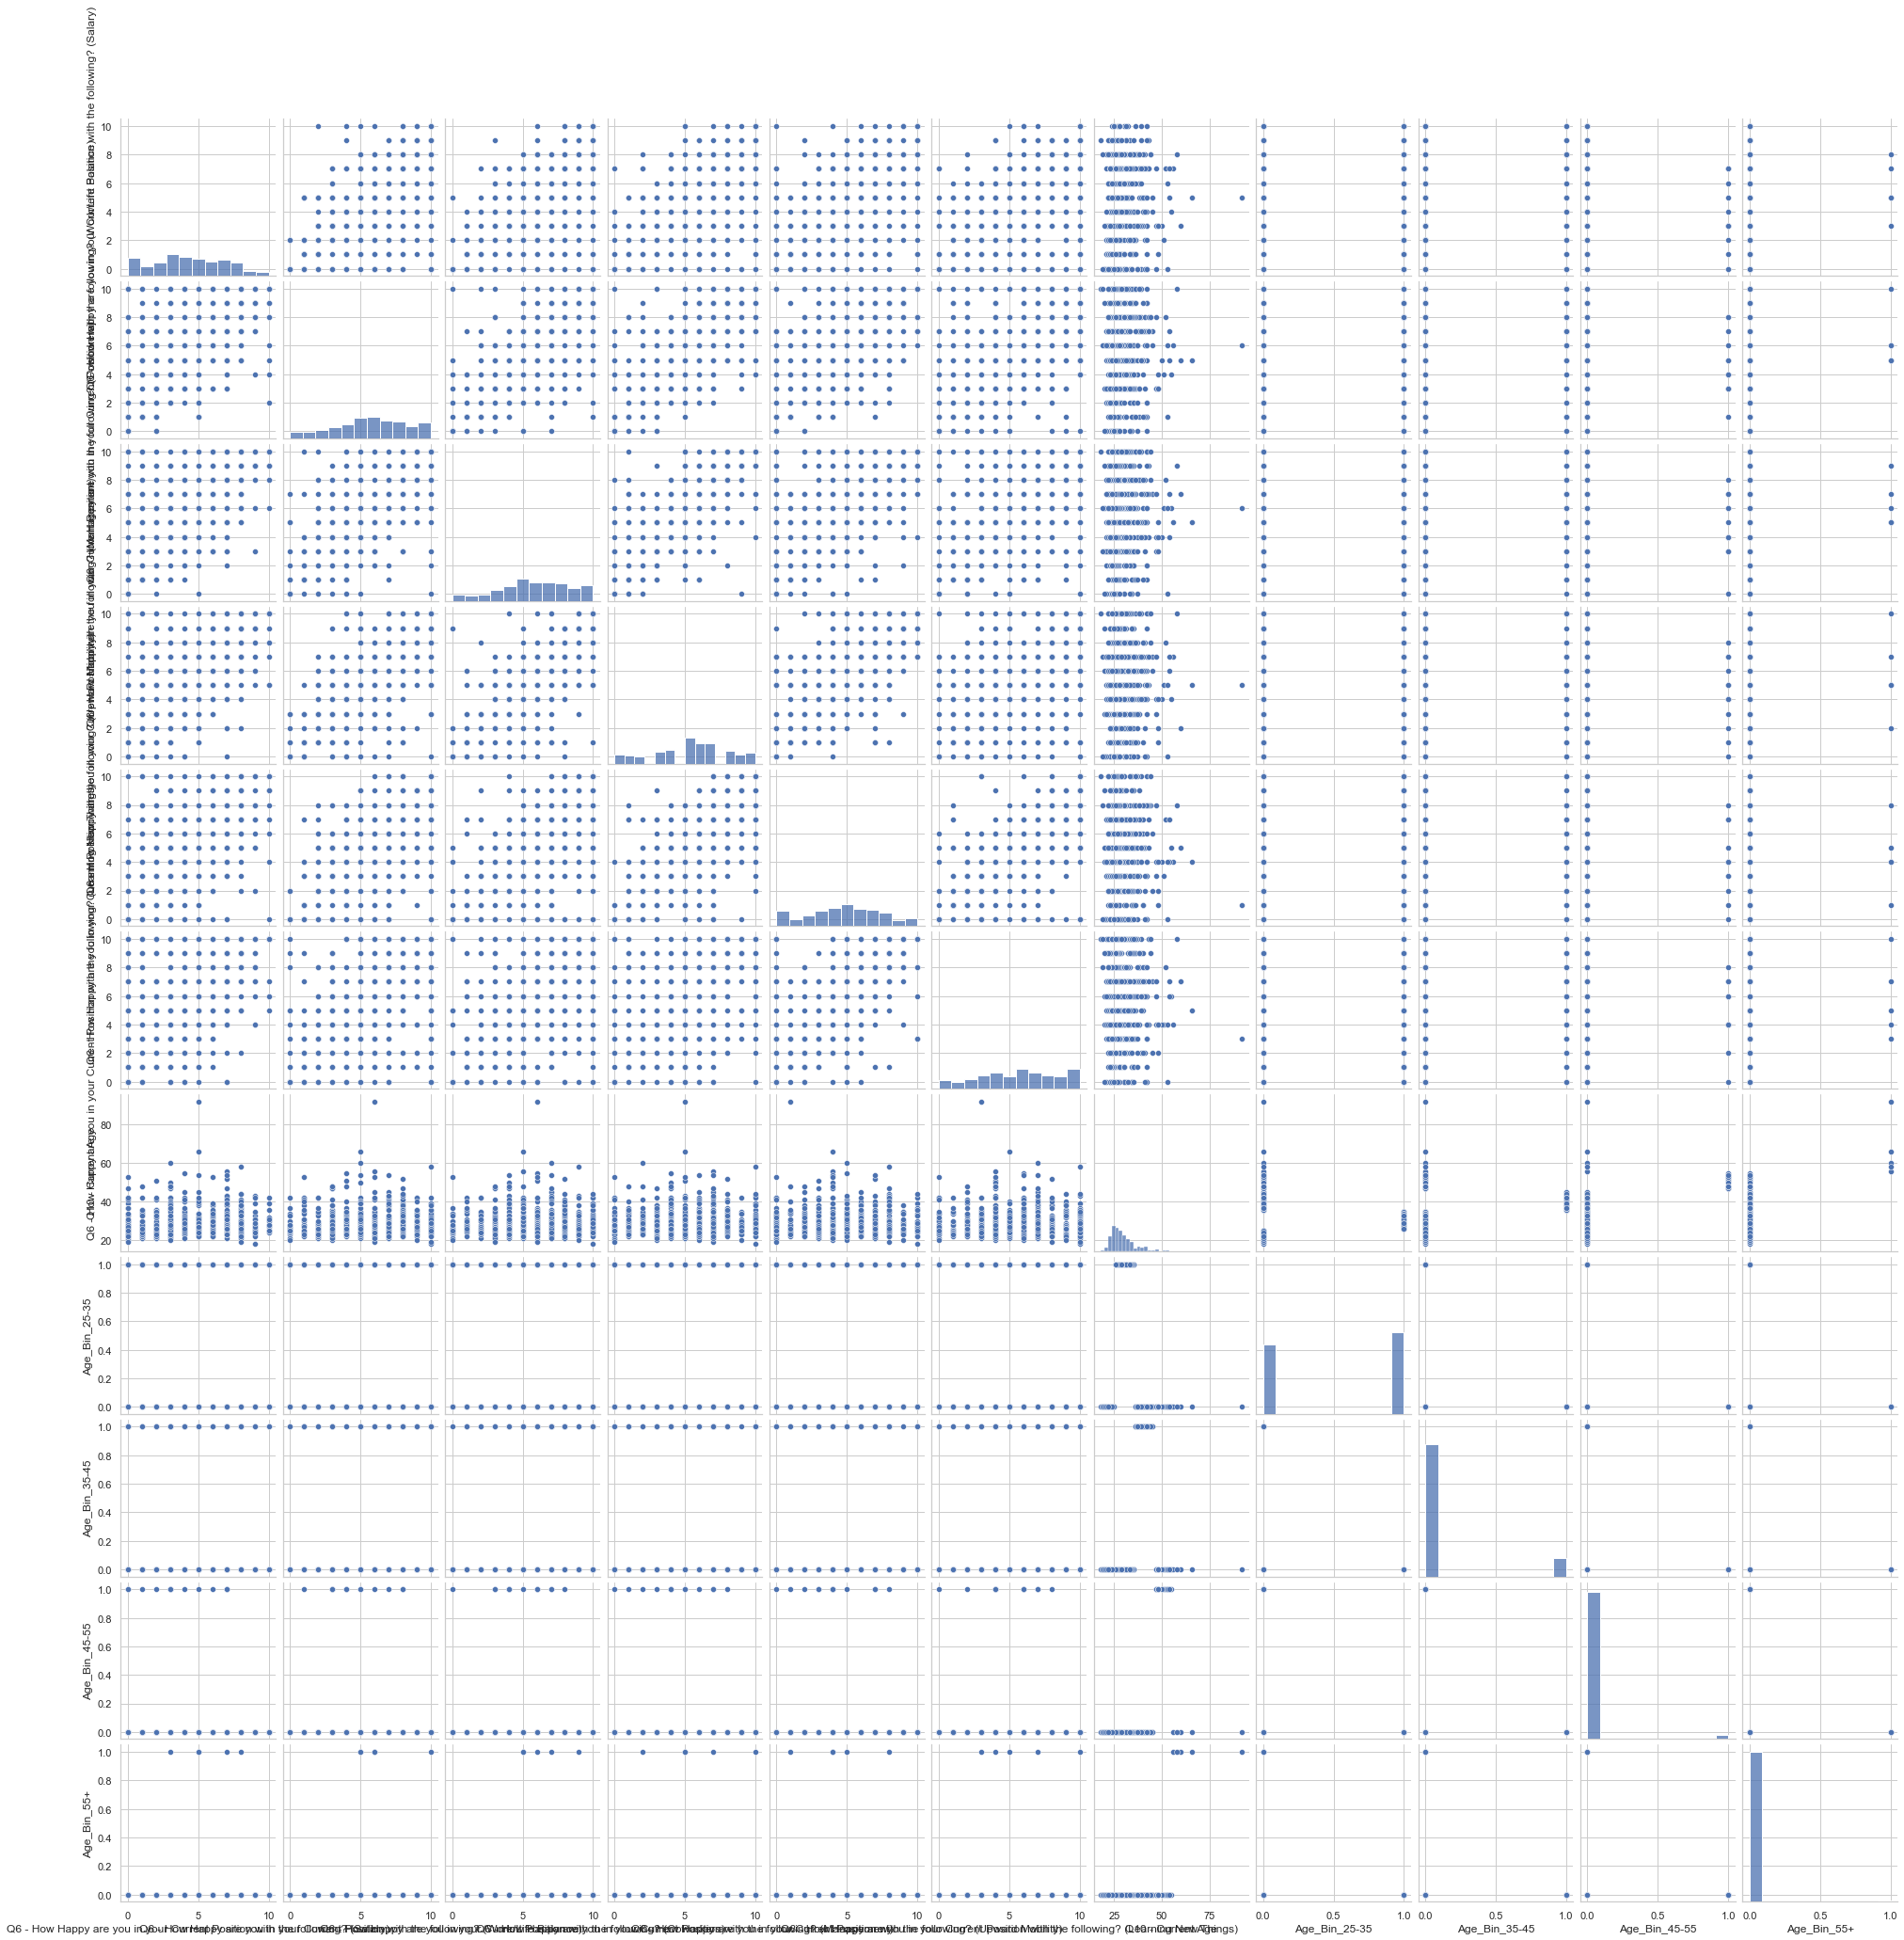

In [69]:
# Pair Plot
sns.pairplot(data_encoded)
plt.show()